## Python Basic

In [1]:
a = 3
b = 2
a + b

5

## BTC Investment
- https://www.coingecko.com/en/price_charts/bitcoin/usd#panel

### 資料蒐集

In [2]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd/90_days.json')
res

<Response [200]>

### 資料整理

In [7]:
import pandas
df = pandas.DataFrame(res.json()['stats'])
df.columns = ['time', 'price']
df.index = df['time']
df.head()


,time,price
time,,
1.502410e+12,1.502410e+12,3562.59
1.502496e+12,1.502496e+12,3800.14
1.502582e+12,1.502582e+12,4023.25
1.502669e+12,1.502669e+12,4175.70
1.502755e+12,1.502755e+12,4149.31


### 資料視覺化

Populating the interactive namespace from numpy and matplotlib


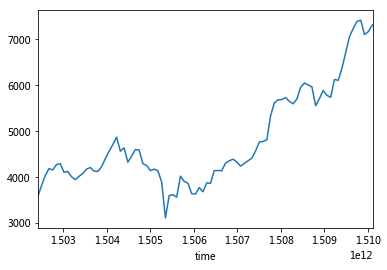

In [8]:
%pylab inline
df['price'].plot(kind = 'line')

### 計算均價

In [13]:
df['mvg'] = df['price'].rolling(window = 30).mean()

In [11]:
df.head(10)

,time,price,mvg
time,,,
1.502410e+12,1.502410e+12,3562.59,NaN
1.502496e+12,1.502496e+12,3800.14,NaN
1.502582e+12,1.502582e+12,4023.25,NaN
1.502669e+12,1.502669e+12,4175.70,NaN
1.502755e+12,1.502755e+12,4149.31,NaN
1.502842e+12,1.502842e+12,4262.56,NaN
1.502928e+12,1.502928e+12,4286.92,4037.210000
1.503014e+12,1.503014e+12,4097.69,4113.652857
1.503101e+12,1.503101e+12,4115.21,4158.662857


### 得到決策結果

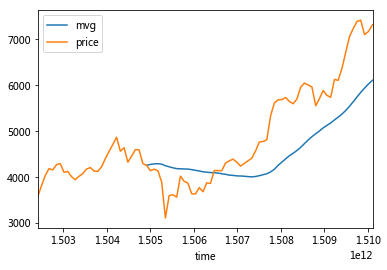

In [14]:
df[['mvg', 'price']].plot(kind = 'line')

## 資料蒐集

In [17]:
import requests
headers = {
    'User-Agent': 'QOO is coming'
}
res = requests.get('http://www.largitdata.com', headers = headers)
res

<Response [200]>

In [19]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/?kind=0&region=1', headers = headers)
#res.text

### 591 租屋資料抓取

In [23]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5', headers = headers)
#res.json()

### 圖片抓取

In [24]:
res = requests.get('https://hp2.591.com.tw/house/active/2017/03/21/149007764913629709_210x158.crop.jpg')
with open('house.jpg', 'wb') as f:
    f.write(res.content)

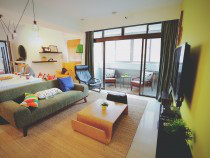

In [25]:
from PIL import Image
Image.open('house.jpg')

### 音樂抓取

In [26]:
import requests

res = requests.get('https://www.e-classical.com.tw/upload/music/20170928171211_mp3.mp3')
with open('music.mp3', 'wb') as f:
    f.write(res.content)

## 語音小秘書

In [27]:
! pip install PyAudio

  Using cached PyAudio-0.2.11-cp36-cp36m-win_amd64.whl


  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000000000462D4A8>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed',)': /simple/pyaudio/


In [28]:
! pip install SpeechRecognition

  Using cached SpeechRecognition-3.7.1-py2.py3-none-any.whl


In [29]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

r.recognize_google(audio, language='zh-TW')

'很高興今天來到遠傳'

In [30]:
! pip install gTTS

  Running setup.py bdist_wheel for gTTS: started
  Running setup.py bdist_wheel for gTTS: finished with status 'done'
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\ef\e7\2e\066d7be1514f7c7fd6c942f4d09ae5460f9a3125829782d03d
Successfully built gTTS


In [31]:
! pip install pygame

  Using cached pygame-1.9.3-cp36-cp36m-win_amd64.whl


In [33]:
from gtts import gTTS
from pygame import mixer
mixer.init()
import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=True) as fp:
        tts = gTTS(text=sentence, lang='zh')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()
speak('我也很開心看到妳')

In [39]:
import requests
from bs4 import BeautifulSoup
def getWiki(term):
    res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(term))
    soup = BeautifulSoup(res.text, 'html.parser')
    return soup.select('#mw-content-text p')[1].text

In [42]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)

question = r.recognize_google(audio, language='zh-TW')
print(question)
speak(getWiki(question))

少女時代


## 資料清理

In [44]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5', headers = headers)
jd = res.json()

In [67]:
import pandas
df = pandas.DataFrame(jd['data']['data'])

In [50]:
df.to_excel('591.xlsx')

In [68]:
df.head()

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,65號,信義路三段大安森林公園第..,大安森林公園第一排坐擁花園大露台舒適環境,大安森林公園第一排坐擁花園大露台舒適環境,,14,...,0,信義路三段,25647,1,元/月,1509255648,1018433,vipStyle,,isvip
1,,0,0,1,,信義路三段信義建國高級住..,信義建國高級住宅,信義建國高級住宅,,12,...,0,信義路三段,25647,1,元/月,1510054322,2129906,vipStyle,,isvip
2,,0,0,1,,樂業街2房1廳基隆..,2房1廳基隆路二段六张犁站民生國小遼寧夜,2房1廳基隆路二段六张犁站民生國小遼寧夜,,4,...,0,樂業街,25674,1,元/月,1509964440,2099368,vipStyle,,isvip
3,,0,0,1,,泰順街62巷近台大NT..,近台大NTU師大NTNU古亭國小捷運月租,近台大NTU師大NTNU古亭國小捷運月租,62巷,5,...,0,泰順街,25652,1,元/月,1509795673,884313,vipStyle,,isvip
4,,0,0,1,505號,光復南路*翠亨雅舍..,*翠亨雅舍12樓近通化夜市文昌街旁,*翠亨雅舍12樓近通化夜市文昌街旁,,12,...,0,光復南路,25623,1,元/月,1509433720,491365,vipStyle,,isvip


In [69]:
df = df[['houseid','address', 'floor', 'allfloor', 'layout', 'area', 'price', 'browsenum_all', 'updatetime']]

In [70]:
p = '93,000'
int(p.replace(',', ''))

93000

In [71]:
def normalizePrice(ele):
    return int(ele.replace(',', ''))
    
    
df['price'] = df['price'].map(normalizePrice)

In [72]:
df['price'].describe()

count        30.000000
mean      46078.833333
std       30423.797126
min       13000.000000
25%       26875.000000
50%       37000.000000
75%       53750.000000
max      160000.000000
Name: price, dtype: float64

In [73]:
df[df['price'] == df['price'].max() ]

,houseid,address,floor,allfloor,layout,area,price,browsenum_all,updatetime
26,5754443,羅斯福路三段出價可談-租..,19,19,4房2廳4衛,102.0,160000,130,1509596790


In [75]:
df['updatetime'] = pandas.to_datetime(df['updatetime'], unit = 's')

In [76]:
df

,houseid,address,floor,allfloor,layout,area,price,browsenum_all,updatetime
0,5740806,信義路三段大安森林公園第..,3,14,3房2廳2衛,42.0,93000,531,2017-10-29 05:40:48
1,5771943,信義路三段信義建國高級住..,7,12,3房2廳2衛,29.1,80000,44,2017-11-07 11:32:02
2,5712562,樂業街2房1廳基隆..,2,4,2房1廳1衛,20.0,21006,3780,2017-11-06 10:34:00
3,5730637,泰順街62巷近台大NT..,2,5,3房2廳2衛,35.0,40000,662,2017-11-04 11:41:13
4,5658813,光復南路*翠亨雅舍..,12,12,1房0廳1衛,13.0,22720,3426,2017-10-31 07:08:40
5,5765080,基隆路二段184巷六..,5,5,2房1廳1衛,27.0,26000,567,2017-11-05 13:32:05
6,5748811,新生南路一段97巷忠孝新生..,4,4,2房2廳1衛,40.0,38000,383,2017-11-06 18:22:46
7,5758568,光復南路電梯兩房仁..,2,10,2房1廳1衛,25.0,25039,892,2017-11-06 06:53:18
8,5712054,信義路三段大安森林..,12,14,1房2廳1衛,14.0,36000,1452,2017-10-19 09:23:31
9,5751804,仁愛路四段112巷擁抱仁愛..,2,7,3房2廳2衛,40.0,55000,409,2017-11-03 03:23:24


## 正規表達法

In [77]:
a = ' my phone number is 0912345678, please call me after the meeting is end'
'0912345678' in a

True

In [80]:
import re
s = 'o'
print(re.match('o', s))

# [] match any character within []
print(re.match('[abcdefghijklmnopqrstuvwxyz]', s))

# - : [a-z] => [abcdedghijklmnopqrstuvwxyz]
print(re.match('[a-z]', s))

<_sre.SRE_Match object; span=(0, 1), match='o'>
<_sre.SRE_Match object; span=(0, 1), match='o'>
<_sre.SRE_Match object; span=(0, 1), match='o'>


In [82]:
n  = '5'
print(re.match('[0123456789]', n))
print(re.match('[0-9]', n))

# \d: \d => [0-9]
print(re.match('\d', n))

<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='5'>


In [87]:
s = 'P'
print(re.match('[a-zA-Z0-9]',s))

# \w : \w => [a-zA-Z0-9]
print(re.match('\w',s))

s = '&'
print(re.match('\w',s))

# .: . => [a-zA-Z!@#$%^&...] (any character)
print(re.match('.', s))


<_sre.SRE_Match object; span=(0, 1), match='P'>
<_sre.SRE_Match object; span=(0, 1), match='P'>
None
<_sre.SRE_Match object; span=(0, 1), match='&'>


In [98]:
s = 'Apple'
print(re.match('\w', s))

# {} match the number of occurence within {}
print(re.match('\w{5}', s))

# {m,n} : match at least 4 character, match at most 8 character
print(re.match('\w{4,8}', s))

# {1, }
print(re.match('\w{1,}', s))

# +: + => {1,}
print(re.match('\w+', s))

# {0, }
print(re.match('\w{0,}', s))

# *: * => {0,}
print(re.match('\w*', s))

<_sre.SRE_Match object; span=(0, 1), match='A'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>
<_sre.SRE_Match object; span=(0, 5), match='Apple'>


In [103]:
phones = ['0912345678', '0912-345678', '0912-345-678', '0910830921890285309580358035']
for p in phones:
    #print(re.match('09\d{8}', p))
    #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p))
    
    # ? : ? => {0,1}
    #print(re.match('09\d{2}-?\d{3}-?\d{3}', p))
    
    # ^ match initial , $ match end
    print(re.match('^09\d{2}-?\d{3}-?\d{3}$', p ))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None


In [110]:
address = '新北市中和區和平街'
import re
m = re.match('(.+?市)(.+?區)(.+?街)', address)
m.group(1), m.group(2), m.group(3)

('新北市', '中和區', '和平街')

In [107]:
df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

C:\ProgramData\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [108]:
df.head()

,houseid,address,floor,allfloor,layout,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
0,5740806,信義路三段大安森林公園第..,3,14,3房2廳2衛,42.0,93000,531,2017-10-29 05:40:48,3,2,2
1,5771943,信義路三段信義建國高級住..,7,12,3房2廳2衛,29.1,80000,44,2017-11-07 11:32:02,3,2,2
2,5712562,樂業街2房1廳基隆..,2,4,2房1廳1衛,20.0,21006,3780,2017-11-06 10:34:00,2,1,1
3,5730637,泰順街62巷近台大NT..,2,5,3房2廳2衛,35.0,40000,662,2017-11-04 11:41:13,3,2,2
4,5658813,光復南路*翠亨雅舍..,12,12,1房0廳1衛,13.0,22720,3426,2017-10-31 07:08:40,1,0,1


## 完成 591 網站爬蟲

In [ ]:
import requests
def normalizePrice(ele):
    return int(ele.replace(',', ''))
url = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=742'
house_ary = []
for i in range(0,24):
    print(i)
    #print(url.format(i * 30))
    res = requests.get(url.format(i * 30), headers = headers)
    jd = res.json()
    df = pandas.DataFrame(jd['data']['data'])
    df = df[['houseid','address', 'floor', 'allfloor', 'layout', 'area', 'price', 'browsenum_all', 'updatetime']]
    df['price'] = df['price'].map(normalizePrice)
    df['updatetime'] = pandas.to_datetime(df['updatetime'], unit = 's')  
    df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
    del df['layout']
    house_ary.append(df)

In [120]:
housedf = pandas.concat(house_ary)
housedf.count()

houseid          270
address          270
floor            270
allfloor         270
area             270
price            270
browsenum_all    270
updatetime       270
bedroom          266
living_room      266
bathroom         266
dtype: int64

In [123]:
housedf.describe()

,houseid,floor,allfloor,area,price,browsenum_all
count,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.732517e+06,6.907407,10.114815,39.454815,57796.900000,314.677778
std,3.799249e+04,10.618544,4.072503,19.958487,36291.857052,571.593614
min,5.353873e+06,1.000000,3.000000,5.000000,13000.000000,0.000000
25%,5.711912e+06,3.000000,7.000000,25.000000,38000.000000,59.250000
50%,5.736368e+06,5.000000,10.000000,38.000000,48000.000000,126.000000
75%,5.757368e+06,8.000000,13.750000,49.400000,65000.000000,298.500000
max,5.774890e+06,100.000000,19.000000,157.700000,330000.000000,3794.000000


In [127]:
housedf.sort_values('browsenum_all', ascending=False).head(3)

,houseid,address,floor,allfloor,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
6,5712562,樂業街2房1廳基隆..,2,4,20.0,21006,3794,2017-11-06 10:34:00,2,1,1
8,5658813,光復南路*翠亨雅舍..,12,12,13.0,22720,3433,2017-10-31 07:08:40,1,0,1
3,5684048,忠孝東路三段248巷SOGO復..,5,7,15.0,33000,3228,2017-10-20 20:51:30,2,1,1


## 資料儲存

In [131]:
housedf.to_csv('house_591.csv')

In [133]:
housedf.to_csv('house_591.tsv', sep= '\t')

In [132]:
housedf.to_excel('house_591.xlsx')

In [134]:
import pandas
import sqlite3 
with sqlite3.connect('house.sqlite') as db :
    housedf.to_sql('rent_591', con = db ,if_exists='replace')

In [139]:
with sqlite3.connect('house.sqlite') as db :
    #df2 = pandas.read_sql_query('select address, price, area from rent_591 order by price desc limit 3', con = db)
    df2 = pandas.read_sql_query('select avg(price) from rent_591', con = db)
df2

,avg(price)
0,57796.9


## 資料分析

In [141]:
housedf.describe()

,houseid,floor,allfloor,area,price,browsenum_all
count,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.732517e+06,6.907407,10.114815,39.454815,57796.900000,314.677778
std,3.799249e+04,10.618544,4.072503,19.958487,36291.857052,571.593614
min,5.353873e+06,1.000000,3.000000,5.000000,13000.000000,0.000000
25%,5.711912e+06,3.000000,7.000000,25.000000,38000.000000,59.250000
50%,5.736368e+06,5.000000,10.000000,38.000000,48000.000000,126.000000
75%,5.757368e+06,8.000000,13.750000,49.400000,65000.000000,298.500000
max,5.774890e+06,100.000000,19.000000,157.700000,330000.000000,3794.000000


In [143]:
# SELECT * FROM rent_591 ORDER BY price LIMIT 3;
housedf.sort_values('price').head(3)

,houseid,address,floor,allfloor,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
3,5760261,仁愛路四段近捷運，東區旁..,100,4,5.0,13000,775,2017-11-03 15:52:32,1,1,1
17,5710294,復興南路一段79巷忠孝復興..,5,5,29.0,16500,3089,2017-10-19 02:09:40,1,0,1
12,5755882,浦城街6巷古亭站5..,2,4,10.0,18000,949,2017-11-02 09:50:17,1,1,1


In [145]:
# SELECT * FROM rent_591 ORDER BY price DESC LIMIT 3;
housedf.sort_values('price', ascending=False).head(3)

,houseid,address,floor,allfloor,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
22,5774247,敦化南路236巷精緻裝潢，..,8,12,94.0,330000,16,2017-11-08 03:44:52,3,2,2
11,5723522,新生南路二段頂高麗景大安公園..,4,15,118.3,210000,268,2017-10-23 08:59:54,4,2,3
29,5746154,新生南路二段正面大安森林公園..,4,15,157.7,210000,63,2017-10-31 01:39:21,3,2,3


In [146]:
# SELECT * FROM rent_591 ORDER BY browsenum_all LIMIT 3;
housedf.sort_values('browsenum_all').head(3)

,houseid,address,floor,allfloor,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
6,5774890,新生南路一段161巷近大安林森..,4,6,64.9,60000,0,2017-11-08 06:40:05,4,2,2
11,5774881,光復南路精美2+1房●家電俱全..,6,14,25.0,42000,0,2017-11-08 06:38:31,2,1,1
18,5774483,和平東路三段@@大安區六張犁捷..,12,12,40.0,40000,3,2017-11-08 04:46:11,3,2,2


In [147]:
# SELECT * FROM rent_591 ORDER BY browsenum_all DESC LIMIT 3;
housedf.sort_values('browsenum_all', ascending=False).head(3)

,houseid,address,floor,allfloor,area,price,browsenum_all,updatetime,bedroom,living_room,bathroom
6,5712562,樂業街2房1廳基隆..,2,4,20.0,21006,3794,2017-11-06 10:34:00,2,1,1
8,5658813,光復南路*翠亨雅舍..,12,12,13.0,22720,3433,2017-10-31 07:08:40,1,0,1
3,5684048,忠孝東路三段248巷SOGO復..,5,7,15.0,33000,3228,2017-10-20 20:51:30,2,1,1


In [160]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(housedf[['area']], housedf['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
print(clf.intercept_)

-571.686319948


In [152]:
print(clf.coef_)

[ 1479.37803267]


In [154]:
clf.coef_[0] * 20 + clf.intercept_ 

29015.874333375225

## 資料視覺化

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


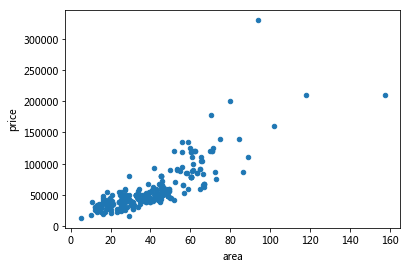

In [155]:
% pylab inline
housedf.plot(kind = 'scatter', x = 'area', y = 'price')

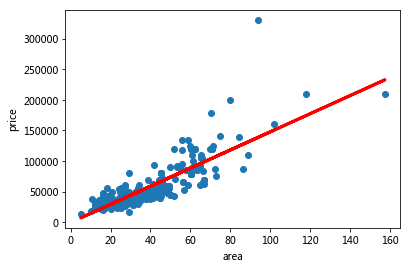

In [162]:
from matplotlib import pylab as plt
X = housedf[['area']]
y = housedf['price']
plt.scatter(X, y)
plt.plot(X, clf.predict(X), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')